In [1]:
import numpy as np
import matplotlib.pyplot as plt

<img src="Graficas electronica industrial/circuito1.png">

In [2]:
x = np.linspace(0, 2*np.pi, 500)

def f(x):
    return np.sin(x)

Text(3.141592653589793, 0, 'pi')

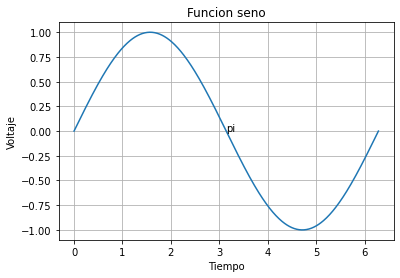

In [3]:
plt.plot(x, f(x))
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("Funcion seno")
plt.text(np.pi, 0, "pi")

Text(0.39269908169872414, 31.112698372208094, 'Vm = 31.112698372208094')

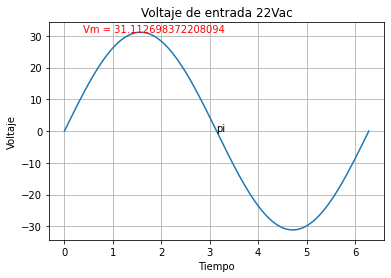

In [4]:
t = np.linspace(0, 2*np.pi, 1000) #Tiempo
vm = 22*np.sqrt(2) #Voltaje maximo = Vrms*√2
vd = 0.7 # Voltaje del diodo
vcc = 15
f = 60
ic = 1.2*10**-3
c = 1*10**-6

def vi(t):
    return vm*np.sin(t)

plt.plot(t, vi(t))
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("Voltaje de entrada 22Vac")
plt.text(np.pi, 0, "pi")
plt.text(np.pi/8, vi(np.pi/2), "Vm = " + str(vi(np.pi/2)), color="red")

Text(3.141592653589793, 0, 'pi')

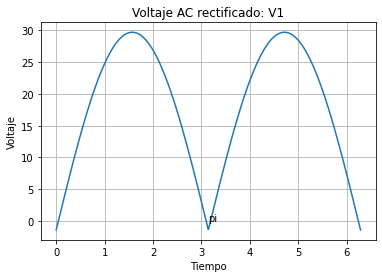

In [5]:
v1 = abs(vi(t)) - 2*vd

plt.plot(t, v1)
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("Voltaje AC rectificado: V1")
plt.text(np.pi, 0, "pi")

In [25]:
#Aqui hare una funcion de detector de cruce por ceros

def dcc():
    cc = []
    
    for i in v1:
        if i <= 0.1:
            cc.append(vcc)
        
        else:
            cc.append(0)    
    return np.array(cc)

angulo_cc = np.arcsin(0.1/vm) #Calculamos el angulo de Cruce por Cero en radianes
angulo_cc

0.0032141272666480025

Text(3.141592653589793, 0, 'pi')

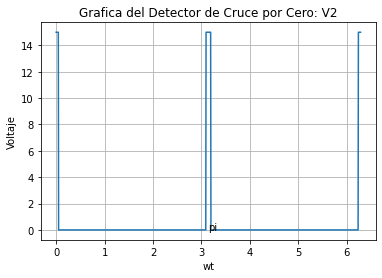

In [26]:
v2 = dcc() #Como vemos en la figura la salida del DCC es V2

plt.plot(t, v2)
plt.grid()
plt.xlabel("wt")
plt.ylabel("Voltaje")
plt.title("Grafica del Detector de Cruce por Cero: V2")
plt.text(np.pi, 0, "pi")

In [8]:
tc = (1/f)/2 #Tiempo de carga del condensador
vcm = ic*tc/c #Voltaje del condensador en un tiempo de pi/2, es decir el maximo que alcanza antes de descargarse
vcm

10.0

In [21]:
n = 8
t[n], v2[n]

(0.05031579825569238, 0)

In [22]:
#Definimos una funcion para el voltaje del condensador en el tiempo

def vc(t):
    vc = []
    tiempo = []
    tiempo_activo = 0
    
    for i, j in zip(v2, t):
        if i == 0:
            tiempo.append(j*tc/np.pi) #Aqui el tiempo lo pasamos de radianes a segundos
            vc.append(ic*tiempo[tiempo_activo]/c)
            tiempo_activo += 1
        else:
            tiempo.append(j*tc/np.pi)
            vc.append(0.2)
            tiempo_activo = 0
            
    return np.array(vc)

Text(3.141592653589793, 0, 'pi')

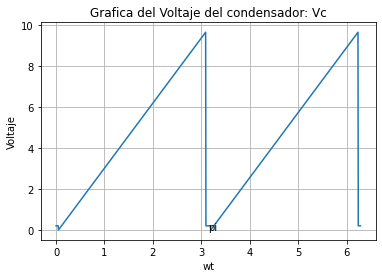

In [24]:
vc = vc(t)

plt.plot(t, vc)
plt.grid()
plt.xlabel("wt")
plt.ylabel("Voltaje")
plt.title("Grafica del Voltaje del condensador: Vc")
plt.text(np.pi, 0, "pi")

In [27]:
#Aqui hare una funcion para la salida de v3

def v3():
    v = []
    
    for i in vc:
        if i <= 5:
            v.append(0)
        
        else:
            v.append(vcc)    
    return np.array(v)

Text(3.141592653589793, 0, 'pi')

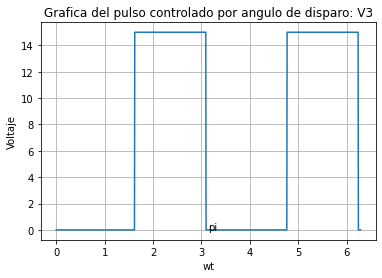

In [28]:
v3 = v3()

plt.plot(t, v3)
plt.grid()
plt.xlabel("wt")
plt.ylabel("Voltaje")
plt.title("Grafica del pulso controlado por angulo de disparo: V3")
plt.text(np.pi, 0, "pi")

Text(3.141592653589793, 0, 'pi')

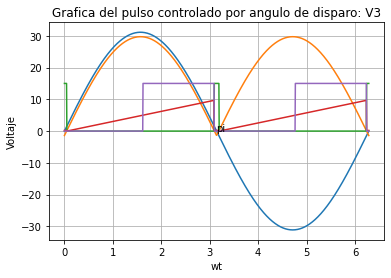

In [29]:
plt.plot(t, vi(t))
plt.plot(t, v1)
plt.plot(t, v2)
plt.plot(t, vc)
plt.plot(t, v3)
plt.grid()
plt.xlabel("wt")
plt.ylabel("Voltaje")
plt.title("Grafica del pulso controlado por angulo de disparo: V3")
plt.text(np.pi, 0, "pi")

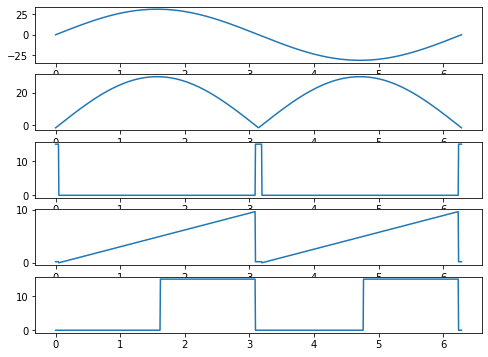

In [36]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1)
ax0.plot(t, vi(t))
ax1.plot(t, v1)
ax2.plot(t, v2)
ax3.plot(t, vc)
ax4.plot(t, v3)
fig.set_size_inches(8, 6)
plt.show()